# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Install cvxopt with pip
# !pip install cvxopt

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [3]:
def svm(X, y):   
    
    has_fitted = False
    # threshold for identifying that this vector is support vector
    sp_v_threshold = 1e-4
    # list for supoort vector indexes
    sp_v_i = []

    
    
    n = len(X)
    dim = len(X[0])
    
#     g_shape = np.zeros((n, dim + 1), dtype=np.float).shape
#     print(g_shape)
    P = matrix(np.identity(dim + 1, dtype=np.float))
    q = matrix(np.zeros((dim + 1,), dtype=np.float))
    G = matrix(np.zeros((n, dim + 1), dtype=np.float))
    h = -matrix(np.ones((n,), dtype=np.float))
    
    P[0, 0] = 0
    # G = [y_1, --y_1 x_1^T--; y_2, --y_2 x_2^T--, ..., y_n, --y_n x_n^T]
    for i in range(n):
        G[i, 0] = -y[i]
#         print(X[i, :])
#         print(y[i])
#         print(-X[i, :] * y[i])
        G[i, 1:] = -X[i, :] * y[i]
#     print('P',P)
#     print('q',q)
#     print('G',G)
#     print('h',h)
    sol = solvers.qp(P, q, G, h)
    
    w = np.zeros(dim,) # weight
    b = sol["x"][0] # bias
    
    for i in range(1, dim + 1):
        w[i - 1] = sol["x"][i]
        
    for i in range(n):
        v = y[i] * (np.dot(w, X[i]) + b)
        if v < (1 + sp_v_threshold):
            sp_v_i.append(i)
            has_fitted = True

    return w, b

In [4]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]
w, b = svm(X,y)

     pcost       dcost       gap    pres   dres
 0:  1.5173e+00  3.7821e+01  1e+02  2e+00  3e+01
 1:  1.3803e+01  9.6371e+00  3e+01  5e-01  7e+00
 2:  2.1717e+01  1.7415e+01  3e+01  4e-01  6e+00
 3:  3.9769e+01  3.8469e+01  8e+00  7e-02  1e+00
 4:  4.3534e+01  4.3375e+01  5e-01  4e-03  6e-02
 5:  4.3726e+01  4.3699e+01  3e-02  8e-06  1e-04
 6:  4.3723e+01  4.3721e+01  1e-03  4e-07  5e-06
 7:  4.3723e+01  4.3723e+01  1e-05  4e-09  5e-08
Optimal solution found.


<ipython-input-3-e8b57f592ac0>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  P = matrix(np.identity(dim + 1, dtype=np.float))
<ipython-input-3-e8b57f592ac0>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q = matrix(np.zeros((dim + 1,), dtype=np.float))
<ipython-input-3-e8b57f592ac0>:18: DeprecationWarning: `np.float` is a deprecate

In [5]:
print(w,b)

[6.83386258 6.38305982] -5.425670975889616


1


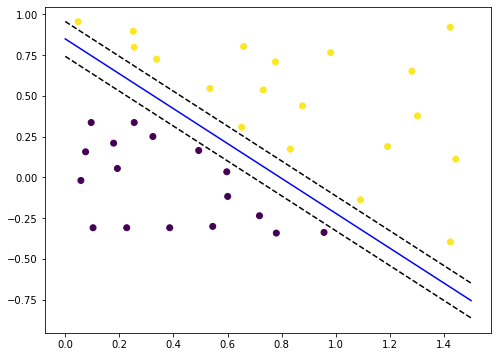

In [6]:
def plot_linear(X ,y, w, b):
    margin = 1/np.linalg.norm(w)

    ax1 = plt.figure(figsize=(8, 6))
    print('1')
    plt.scatter(X[:, 0], X[:, 1], c = y)
    # plot the separating hyperplaneusing w_from_sv and b
    x_hyperplane = np.linspace(0, 1.5)
    y_hyperplane = - (w[0] * x_hyperplane + b) / w[1]
    upper_margin = y_hyperplane + margin
    lower_margin = y_hyperplane - margin
    plt.plot(x_hyperplane, y_hyperplane, 'k-',c = 'b')
    plt.plot(x_hyperplane, upper_margin, 'k--')
    plt.plot(x_hyperplane, lower_margin, 'k--')


    return
plot_linear(X ,y, w, b)

## b) and c) : Linearly Non-separable Dataset

In [7]:
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]

def svm_slack(X, y, C):   
    
    n = len(X)
    dim = len(X[0])
    
    np.zeros(n + 3)
    np.ones(n + 3)
    P = np.concatenate((np.zeros(3),np.ones(n) * C)).reshape(n + 3,1).astype('float')

    q = np.zeros((n + 3,n + 3)).astype('float')
    q[0][0] = 1.0
    q[1][1] = 1.0

    G_upper_left = np.concatenate((-X*y.reshape(111,1),-y.reshape(111,1)), axis=1)
    G_l = np.vstack((G_upper_left,np.zeros((n,3))))
    G_r = np.vstack((np.eye(n) * -1, np.eye(n) * -1))
    # G = np.hstack((G_l,G_r))
    G = np.concatenate((G_l,G_r), axis = 1).astype('float')

    h = np.concatenate((-np.ones(n),np.zeros(n))).reshape(2*n,1).astype('float')
    P = matrix(P)
    
    q = matrix(q)
    
    G = matrix(G)
    
    h = matrix(h)

    sol = solvers.qp(q, P, G, h)
    
    w = np.zeros(dim,) # weight
    b = sol["x"][2] # bias
    
    for i in range(0,2):
        w[i] = sol["x"][i]


    return w, b 
w, b = svm_slack(X, y, C = 0.05)
print(w,b)

     pcost       dcost       gap    pres   dres
 0:  1.2418e+00  3.9717e+01  6e+02  2e+00  7e+02
 1:  1.0376e+01 -1.5710e+01  3e+01  7e-02  2e+01
 2:  6.1726e+00  1.9674e-01  6e+00  1e-02  3e+00
 3:  2.6757e+00  1.9485e+00  7e-01  1e-03  3e-01
 4:  2.4029e+00  2.1622e+00  2e-01  3e-04  8e-02
 5:  2.3265e+00  2.2274e+00  1e-01  9e-05  3e-02
 6:  2.2888e+00  2.2613e+00  3e-02  2e-05  6e-03
 7:  2.2755e+00  2.2726e+00  3e-03  3e-16  4e-14
 8:  2.2740e+00  2.2739e+00  7e-05  3e-16  2e-14
 9:  2.2739e+00  2.2739e+00  7e-07  4e-16  1e-14
Optimal solution found.
[-0.26849615  0.18572682] 1.1785387677637393


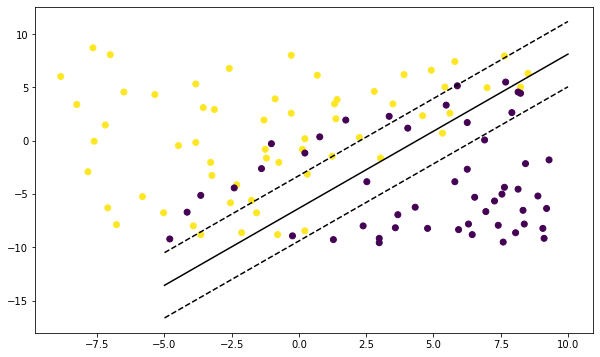

In [8]:
def plot_non_linear(X ,y, w, b):
    margin = 1/np.linalg.norm(w)

    ax1 = plt.figure(figsize=(10, 6))

    plt.scatter(X[:, 0], X[:, 1], c=y)

    # plot the separating hyperplaneusing w_from_sv and b
    x_hyperplane = np.linspace(-5, 10)
    y_hyperplane = - (w[0] * x_hyperplane + b) / w[1]
    upper_margin = y_hyperplane + margin
    lower_margin = y_hyperplane - margin
    plt.plot(x_hyperplane, y_hyperplane, 'k-')
    plt.plot(x_hyperplane, upper_margin, 'k--')
    plt.plot(x_hyperplane, lower_margin, 'k--')


    return
plot_non_linear(X ,y, w, b)

     pcost       dcost       gap    pres   dres
 0:  2.0644e+00  5.0524e+01  7e+02  3e+00  6e+02
 1:  1.9690e+01 -2.3059e+01  5e+01  1e-01  3e+01
 2:  1.1116e+01  1.1465e+00  1e+01  2e-02  4e+00
 3:  5.1661e+00  3.9158e+00  1e+00  2e-03  5e-01
 4:  4.6987e+00  4.3010e+00  4e-01  5e-04  1e-01
 5:  4.5752e+00  4.4251e+00  2e-01  1e-04  3e-02
 6:  4.5227e+00  4.4685e+00  5e-02  3e-05  7e-03
 7:  4.5033e+00  4.4844e+00  2e-02  9e-06  2e-03
 8:  4.4945e+00  4.4920e+00  3e-03  7e-07  2e-04
 9:  4.4932e+00  4.4931e+00  3e-05  8e-09  2e-06
10:  4.4931e+00  4.4931e+00  3e-07  8e-11  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3430e+01  2.5866e+02  1e+03  4e+00  7e+01
 1:  1.3083e+02 -3.0700e+01  2e+02  5e-01  8e+00
 2:  5.6266e+01  3.4536e+01  2e+01  3e-02  5e-01
 3:  4.9781e+01  4.0113e+01  1e+01  1e-02  2e-01
 4:  4.6228e+01  4.2703e+01  4e+00  4e-03  6e-02
 5:  4.5200e+01  4.3715e+01  2e+00  1e-03  2e-02
 6:  4.4871e+01  4.3992e+01  9e-01  4e-04  6e-0

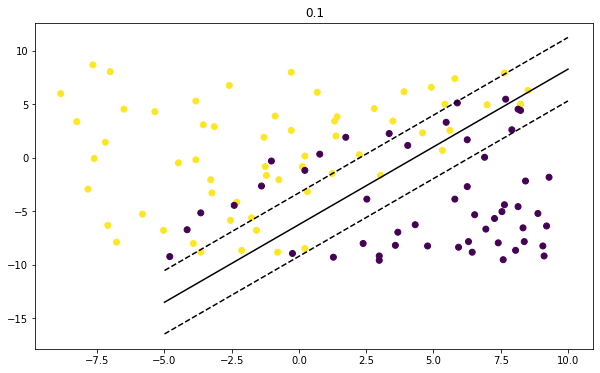

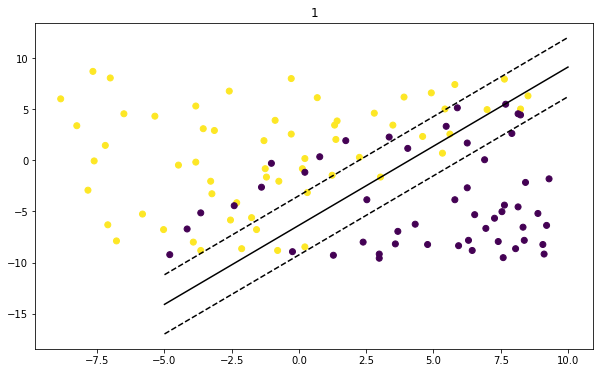

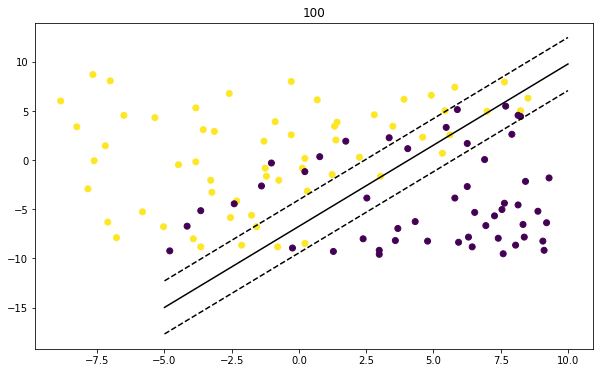

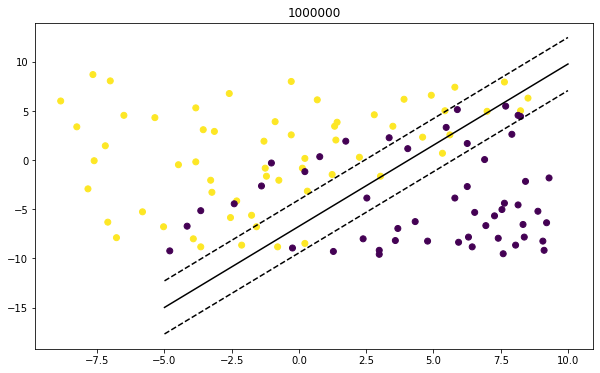

In [9]:
C_list = [0.1, 1, 100, 1000000]
for C in C_list:
    w, b = svm_slack(X, y, C = C)
    plot_non_linear(X ,y, w, b)
    plt.title(C)

### Explain your observations here:

The C parameter tells the SVM optimization how much to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.